In [1]:
# Import modules and libraries
import numpy as np
import matplotlib.pyplot as plt

MSE: 0.33609839970702626
Weight: [[-23.7241495 ]
 [  0.49930802]]


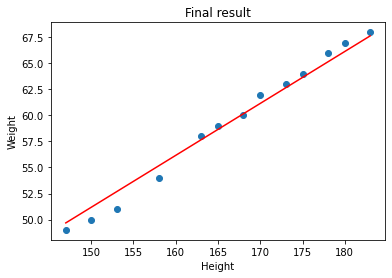

In [2]:
# Training data
N = 13 # number of samples
X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]).reshape(N, 1)
Y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]).reshape(N, 1)

# Function to get the weight for prediction
def getWeight(X, Y, learn_rate=1, number_of_iterations=100000):
    # Create bar for X
    Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    XbarT = Xbar.T
    
    # In order to avoid large number in calculation, this below step is applied
    max = Y[0]
    max = getMax(Y, max)
    max = getMax(X, max)
    
    Xbar = Xbar / max
    XbarT = XbarT / max
    Y = Y / max
    
    # Initialize Weight
    W = np.ones((Xbar.shape[1], 1))
    
    # Update Weight
    for i in range(number_of_iterations):
        W = updateWeight(W, Xbar, XbarT, Y, learn_rate)
    
    return W

# Function to update the weight for prediction
def updateWeight(W, Xbar, XbarT, Y, learn_rate):
    dW = XbarT @ (Xbar @ W - Y) / Y.shape[0] * learn_rate
    return W - dW

# Function to get MSE
def getMSE(X, Y, W):
    Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return 1 / (2 * X.shape[0]) * ((Xbar @ W - Y) ** 2).sum()

# Function to get max element in a matrix (type of numpy.ndarray)
def getMax(array, max):
    for i in range(len(array)):
        if(isinstance(array[i], np.ndarray)):
            max = getMax(array[i], max)
        else:
            max = array[i] if array[i] > max else max
    return max

# Function to plot data
def plot(X, Y, W, labelX="X", labelY="Y", title="Title"):
    Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    plt.scatter(X, Y)
    plt.plot(X, Xbar @ W, "r")
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.title(title)
    plt.show()
    
W = getWeight(X, Y, 2.3, 4000000)

print("MSE: " + str(getMSE(X, Y, W)))
print("Weight: " + str(W))
plot(X, Y, W, "Height", "Weight", "Final result")

